# 1. Import packages


In [485]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 2. Download stock price


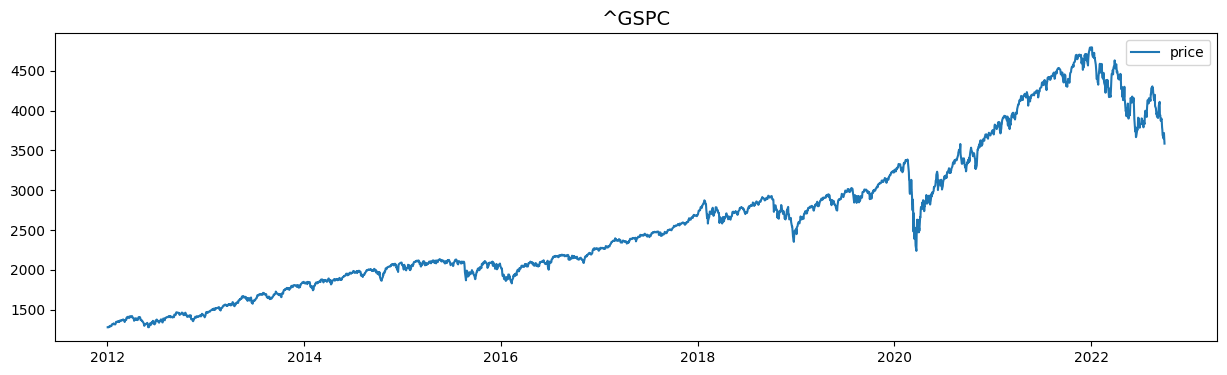

In [486]:
date_0 = '2012-01-01'
date_1 = '2022-10-01'
date_2 = '2022-10-01'
stock = "^GSPC"

data = yf.Ticker(stock).history(start=date_0, end=date_1)
price = data['Close']
x = np.array(price)

data2 = yf.Ticker(stock).history(start=date_0, end=date_2)
price2 = data2['Close']
x2 = np.array(price2)
pl.plt.figure(figsize=(15,4))
pl.plot(price,label='price')
pl.title(stock, fontsize=14)
pl.legend()
pl.show()

In [487]:
# df = pd.Series(price)
data['peaks'] = pd.Series() 
data['valleys'] = pd.Series() 
peaks = data['peaks']
valleys = data['valleys']
# peaks.iloc[11]
i = 100
for idx in range(0, len(price)):
    if price[idx] == price.iloc[idx-i:idx+i].max():
        peaks.iloc[idx] = price[idx]
    if price[idx] == price.iloc[idx-i:idx+i].min():
        valleys.iloc[idx] = price[idx]
        
print(peaks) # [(2, 3), (5, 5), (13, 11)]
print(valleys) # [(3, 2), (9, 1)]


C:\Users\e4903\AppData\Local\Temp\ipykernel_20424\1442808469.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['peaks'] = pd.Series()
C:\Users\e4903\AppData\Local\Temp\ipykernel_20424\1442808469.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['valleys'] = pd.Series()


Date
2012-01-03   NaN
2012-01-04   NaN
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
              ..
2022-09-26   NaN
2022-09-27   NaN
2022-09-28   NaN
2022-09-29   NaN
2022-09-30   NaN
Name: peaks, Length: 2705, dtype: float64
Date
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
2012-01-06            NaN
2012-01-09            NaN
                 ...     
2022-09-26            NaN
2022-09-27            NaN
2022-09-28            NaN
2022-09-29            NaN
2022-09-30    3585.620117
Name: valleys, Length: 2705, dtype: float64


# 3. Count predict days


n_predict =  0
n_x =  2705


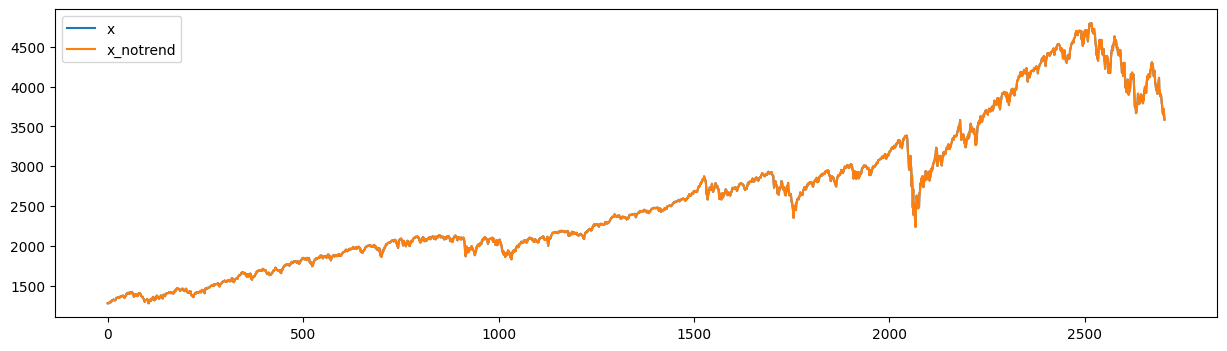

In [489]:
n_predict = price2.size - price.size
print('n_predict = ', n_predict)
n_x = x.size
print('n_x = ', n_x)
n_harm = 10                   # number of harmonics in model
t = np.arange(0, n_x)
p = np.polyfit(t, x, 1)         # find linear trend in x
x_notrend = x          
pl.plt.figure(figsize=(15,4))
plt.plot(x,label='x')
plt.plot(x_notrend,label='x_notrend')
pl.legend()
pl.show()


# 4. FFT


(array([   0,    1,    2, ..., 1350, 1351, 1352], dtype=int32),)


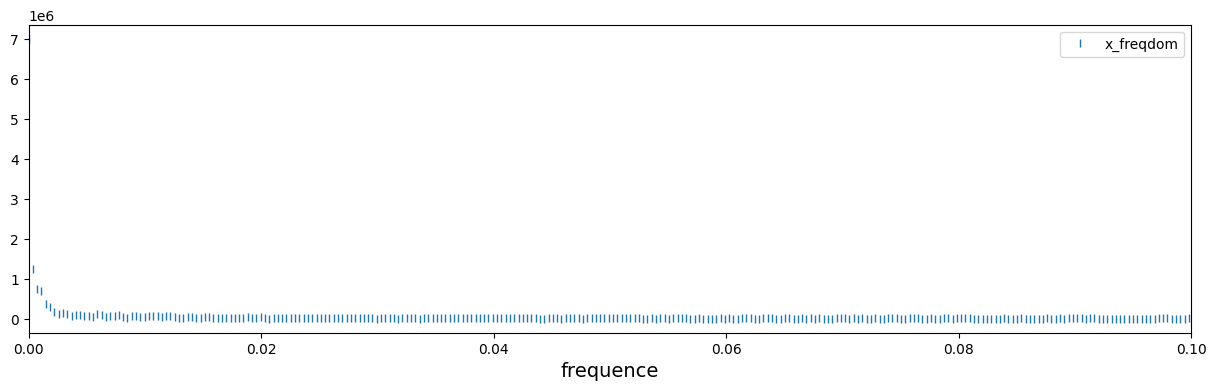

C:\Users\e4903\AppData\Local\Temp\ipykernel_20424\337842868.py:14: RuntimeWarning: divide by zero encountered in divide
  pl.plot(1/f[mask], abs(x_freqdom[mask]),'|' , label="freqdom")


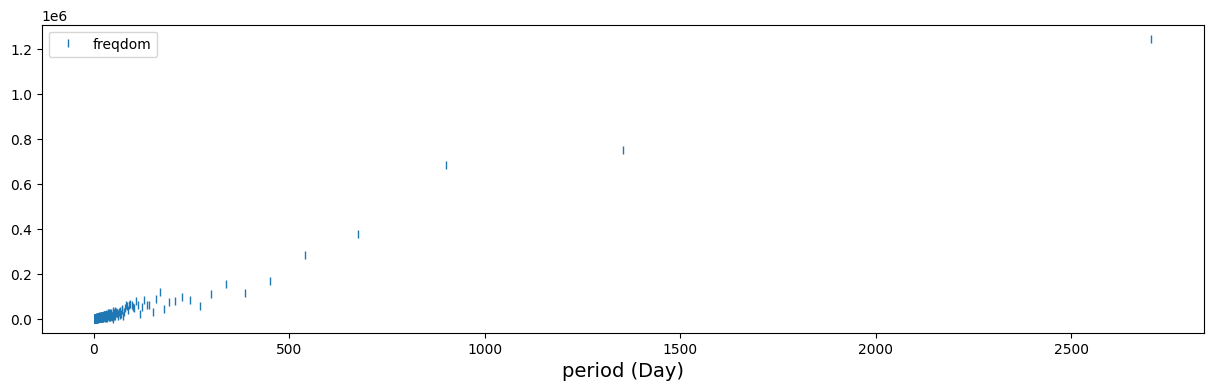

In [490]:
x_freqdom = fft.fft(x_notrend, n_x)  # detrended x in frequency domain
f = fft.fftfreq(n_x)

mask = np.where(f >= 0)
print(mask)
pl.plt.figure(figsize=(15,4))
pl.plot(f[mask], abs(x_freqdom[mask]),'|' ,label="x_freqdom")
pl.xlim(0,0.1)
pl.xlabel('frequence', fontsize=14)
pl.legend()
pl.show()

pl.plt.figure(figsize=(15,4))
pl.plot(1/f[mask], abs(x_freqdom[mask]),'|' , label="freqdom")
pl.xlabel('period (Day)', fontsize=14)
pl.legend()
pl.show()

# 5. Sort index by frequency or by amplitudes


In [491]:
indexes = list(range(n_x))             # frequencies

# indexes.sort(key = lambda i: np.absolute(f[i]))  # sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))  # sort indexes by amplitudes, lower -> higher 
indexes.reverse() # sort indexes by amplitudes, higher -> lower 

# 6. Restore siganl


0
Period :  2705.0 (Days)
ampli : 460.0486221781136
1
Period :  1352.5 (Days)
ampli : 277.69284421584496
2
Period :  901.6666666666667 (Days)
ampli : 253.33568604321
3
Period :  676.25 (Days)
ampli : 138.86897656854856
4
Period :  541.0 (Days)
ampli : 104.11036987392707
5
Period :  450.83333333333337 (Days)
ampli : 62.20212332313435
6
Period :  338.125 (Days)
ampli : 57.41519976721454
7
Period :  169.0625 (Days)
ampli : 44.67555021620276
8
Period :  386.42857142857144 (Days)
ampli : 42.77726975607949
9
Period :  300.5555555555556 (Days)
ampli : 40.9207380639808


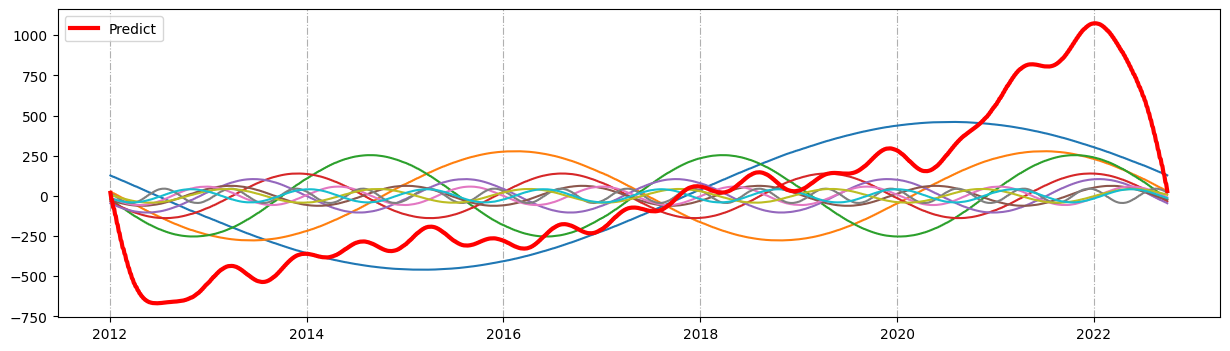

,ampli,phase,f
0,460.048622,-1.291911,-0.000370
1,277.692844,-1.476388,-0.000739
2,253.335686,-1.655928,-0.001109
3,138.868977,-1.832216,-0.001479
4,104.110370,2.042728,0.001848
5,62.202123,-2.012944,-0.002218
6,57.415200,-1.755400,-0.002957
7,44.675550,1.172572,0.005915
8,42.777270,-1.446072,-0.002588
9,40.920738,1.955873,0.003327


In [512]:
t = np.arange(0, n_x + n_predict)
restored_sig = np.zeros(t.size)
count = 0
ampli_list = []
phase_list = []
f_list = []
pl.plt.figure(figsize=(15,4))
for i in indexes[1:1 + n_harm * 2]:
    if (count <= 100 or count >= (n_harm * 2 -2)): 
        if(count % 2 == 0):
            ampli = np.absolute(x_freqdom[i]) / n_x   # amplitude
            phase = np.angle(x_freqdom[i])            # phase
            signal = ampli * np.cos(2 * np.pi * f[i] * t + phase)
            restored_sig += signal
            num = int(count/2)
            sig_num = 'signal_' + str(num) 
            sig_period = 'Period : ' + str( 1/abs(f[i])) + '(Days)'

            ampli_list.append(ampli)
            phase_list.append(phase)
            f_list.append(f[i])
            print(num)
            print('Period : ', 1/abs(f[i]), '(Days)')
            print('ampli :', ampli)
            # fig, axes = plt.subplots(2, 1, figsize=(12, 6))
            # axes[0].plot(signal, 'b')
            # axes[0].set_xlabel(sig_period)
            # axes[1].plot(restored_sig, 'r',label = 'restored_sig')
            # axes[1].set_xlabel(sig_num)
            # pl.legend()
            # plt.tight_layout()
            # plt.show()
            pl.plot(price2.index, signal)
        count += 1
        # num = int(count/2)
        # sig_num = 'signal_' + str(num) 
        # sig_period = 'Period : ' + str( 1/abs(f[i])) + '(Days)'
        # fig, axes = plt.subplots(2, 1, figsize=(12, 6))
        # axes[0].plot(signal, 'b')
        # axes[0].set_xlabel(sig_period)
        # axes[1].plot(restored_sig, 'r',label = 'restored_sig')
        # axes[1].set_xlabel(sig_num)
        # pl.legend()
        # plt.tight_layout()
        # plt.show()
signal = restored_sig
 
# pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Data')
# pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train')
pl.plot(price2.index, signal, 'r',label = 'Predict',linewidth=3)
# plt.plot(price.index,x_notrend,label='x_notrend')
# plt.plot(price.index,x_notrend2,'y',label='x_notrend')
# plt.plot(price.index,x,label='x')
pl.plt.grid(axis='x',linestyle='-.')
pl.legend()
pl.show()

signal_df = pd.DataFrame({
    'ampli' :ampli_list,
    'phase' :phase_list,
    'f' : f_list
})
signal_df

# 7. Plot predicting


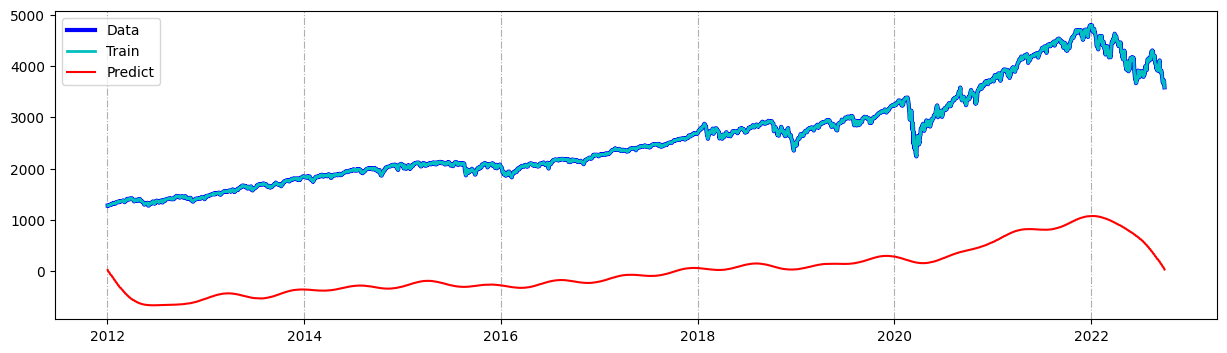

In [493]:
x_notrend2 = x - p[0] * np.arange(0, n_x)
pl.plt.figure(figsize=(15,4)) 
pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Data')
pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train')
pl.plot(price2.index, signal, 'r',label = 'Predict')
# plt.plot(price.index,x_notrend,label='x_notrend')
# plt.plot(price.index,x_notrend2,'y',label='x_notrend')
# plt.plot(price.index,x,label='x')
pl.plt.grid(axis='x',linestyle='-.')
pl.legend()
pl.show()

2705


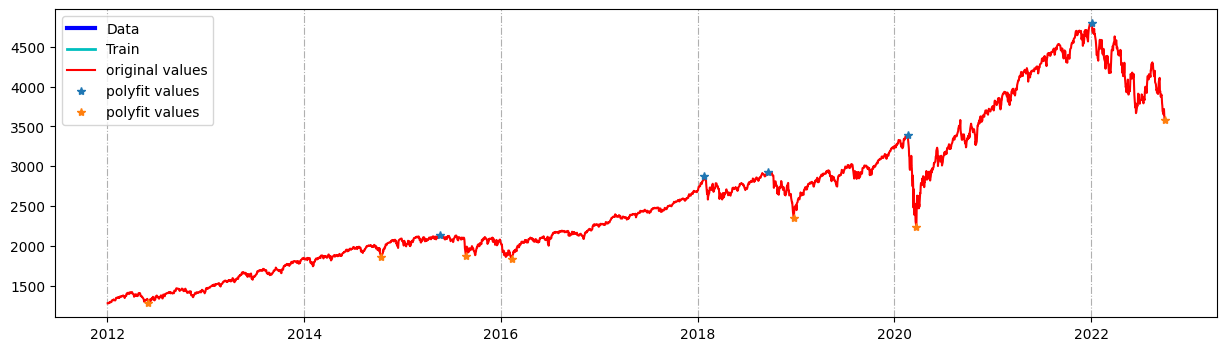

In [494]:
tail_data = price2.size - n_predict*2
print(tail_data)
pl.plt.figure(figsize=(15,4))
pl.plot(price2[tail_data:].index, x2[tail_data:], 'b', linewidth = 3,label = 'Data')
pl.plot(price[tail_data:].index, x[tail_data:], 'c', linewidth = 2, label = 'Train')
# pl.plot(price2[tail_data:].index, signal[tail_data:], 'r',label = 'Predict')
pl.plt.grid(axis='x',linestyle='-.')
plt.plot(price.index,price,'r',label='original values')
plt.plot(peaks.index,peaks,'*',label='polyfit values')
plt.plot(valleys.index,valleys,'*',label='polyfit values')
# plt.xlabel('x axis')
# plt.ylabel('y axis')
plt.legend(loc=4)
# plt.title('polyfitting')
# plt.show()
pl.legend()
pl.show()

In [495]:
pd.options.mode.chained_assignment = None
pv = data2['Close']
data2['peaks'] = pd.Series(dtype='float64') 
data2['valleys'] = pd.Series(dtype='float64') 
peaks = data2['peaks']
valleys = data2['valleys']
# peaks.iloc[11]
i = 100
for idx in range(0, len(pv)):
    if pv[idx] == pv.iloc[idx-i:idx+i].max():
        peaks.iloc[idx] = pv[idx]
    if pv[idx] == pv.iloc[idx-i:idx+i].min():
        valleys.iloc[idx] = pv[idx]

In [497]:
data2['signal'] = signal
pv2 = data2['signal']
data2['peaks2'] = pd.Series(dtype='float64') 
data2['valleys2'] = pd.Series(dtype='float64') 
peaks2 = data2['peaks2']
valleys2 = data2['valleys2']
# peaks.iloc[11]
i = 100
for idx in range(0, len(pv)):
    if pv2[idx] == pv2.iloc[idx-i:idx+i].max():
        peaks2.iloc[idx] = pv2[idx]
    if pv2[idx] == pv2.iloc[idx-i:idx+i].min():
        valleys2.iloc[idx] = pv2[idx]
        
print(peaks2) # [(2, 3), (5, 5), (13, 11)]
print(valleys2) # [(3, 2), (9, 1)]

Date
2012-01-03   NaN
2012-01-04   NaN
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
              ..
2022-09-26   NaN
2022-09-27   NaN
2022-09-28   NaN
2022-09-29   NaN
2022-09-30   NaN
Name: peaks2, Length: 2705, dtype: float64
Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
                ...    
2022-09-26          NaN
2022-09-27          NaN
2022-09-28          NaN
2022-09-29          NaN
2022-09-30    29.420216
Name: valleys2, Length: 2705, dtype: float64


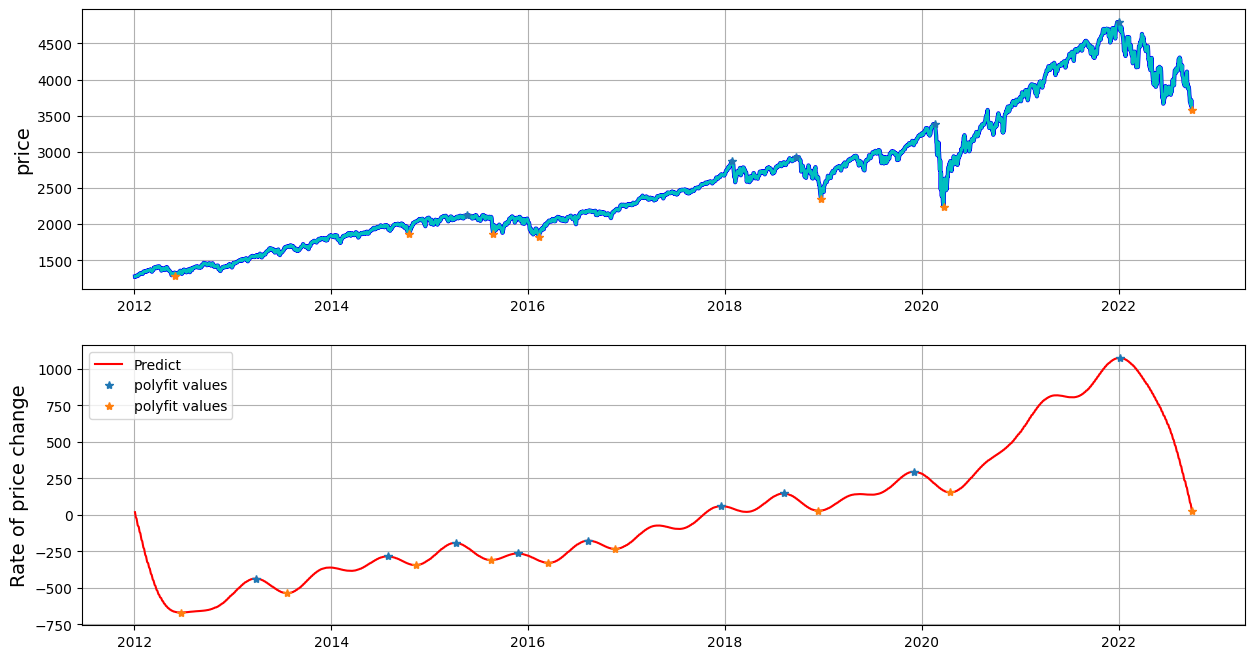

In [498]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'b', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict')
axes[1].grid(True)
axes[1].set_ylabel("Rate of price change", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='polyfit values')
axes[0].plot(valleys.index,valleys,'*',label='polyfit values')
axes[1].plot(peaks2.index,peaks2,'*',label='polyfit values')
axes[1].plot(valleys2.index,valleys2,'*',label='polyfit values')

# plt.xlabel('x axis')
# plt.ylabel('y axis')
plt.legend(loc=4)
pl.legend()
plt.show()


In [499]:
import datetime
data3 = pd.DataFrame()
data3['peaks_1'] = data2['peaks']
# data3['peaks_2'] = data2['peaks2']
# data3['valleys_1'] = data2['valleys']
# data3['valleys_2'] = data2['valleys2']
# data3['123'] = range(0,len(data3))
data3 = data3.dropna(how='all') 
li_peak1 = list(data3['peaks_1'].index)
data4 = pd.DataFrame()
data4['peaks_2'] = data2['peaks2']
data4 = data4.dropna(how='all') 
li_peak2 = list(data4['peaks_2'].index)
li = []
for i in range(0,len(li_peak2)): 
    temp = []
    for j in range(0,len(li_peak1)): 
        temp.append(abs((li_peak2[i] - li_peak1[j]).days))
    li.append(min(temp))
data4['delay'] = li


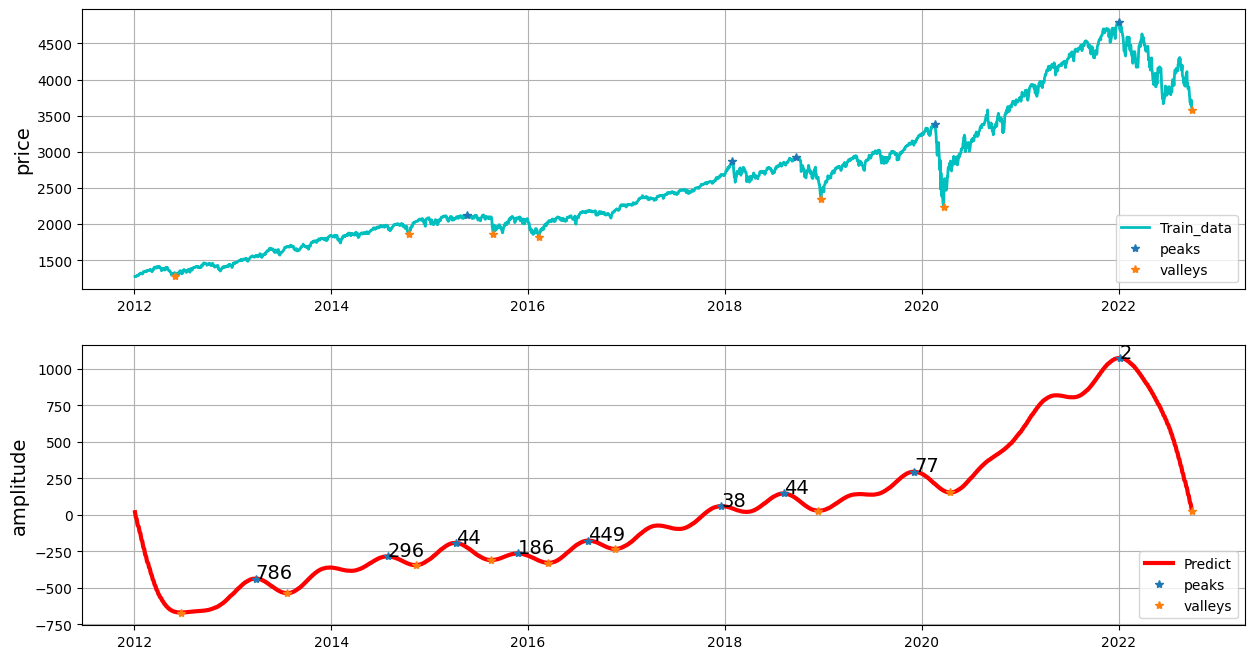

In [508]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
# axes[0].plot(price2.index, x2, 'c', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
axes[1].plot(valleys2.index,valleys2,'*',label='valleys')
# plt.xlabel('x axis')
# plt.ylabel('y axis')
for i, label in enumerate(li):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
axes[1].legend(loc=4)
# pl.legend()
plt.show()


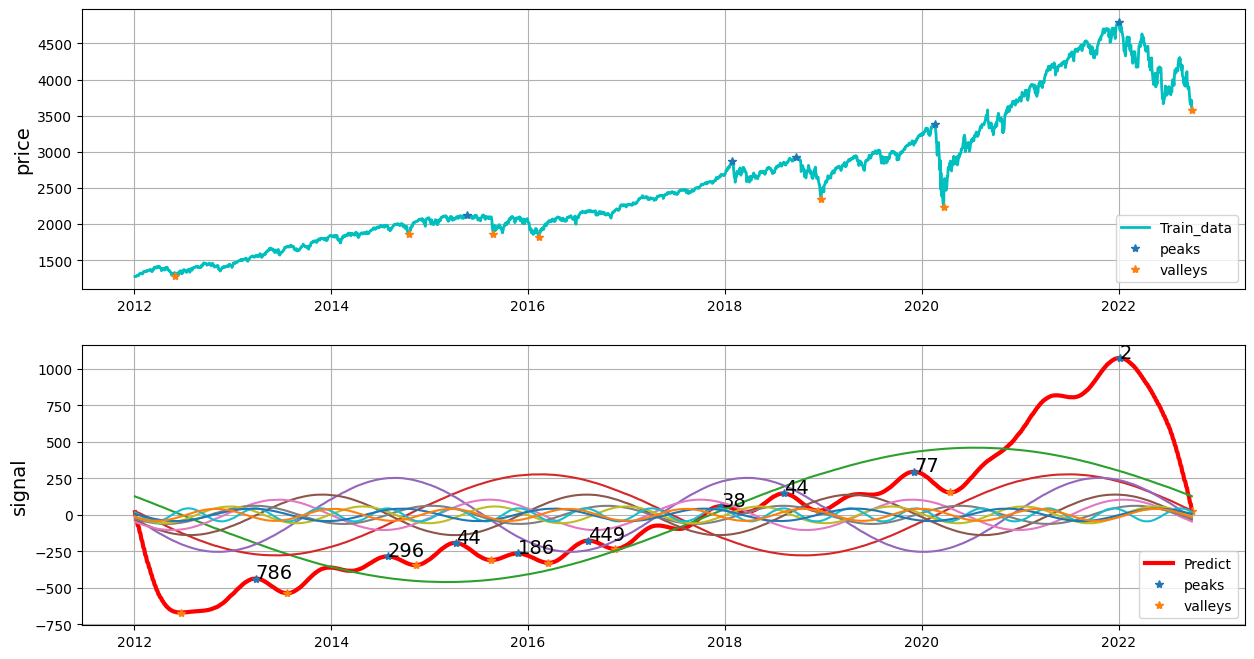

In [505]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
# axes[0].plot(price2.index, x2, 'c', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("signal", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
axes[1].plot(valleys2.index,valleys2,'*',label='valleys')
# plt.xlabel('x axis')
# plt.ylabel('y axis')
for i, label in enumerate(li):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
for i in range(0,len(signal_df)):
    signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
    axes[1].plot(price2.index,signal2)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
axes[1].legend(loc=4)
# pl.legend()
plt.show()
